In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 640x480 with 0 Axes>

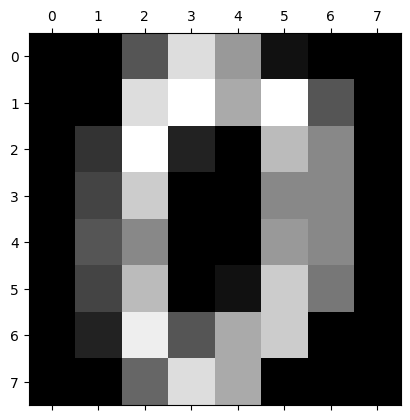

In [3]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [4]:
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [6]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)


Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]


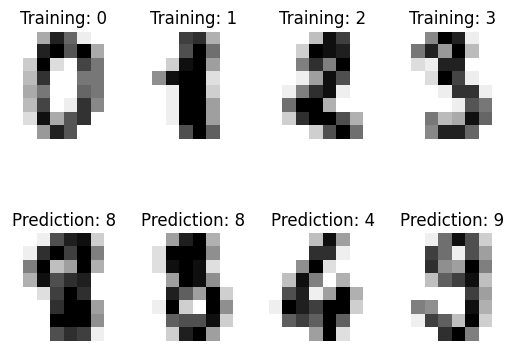

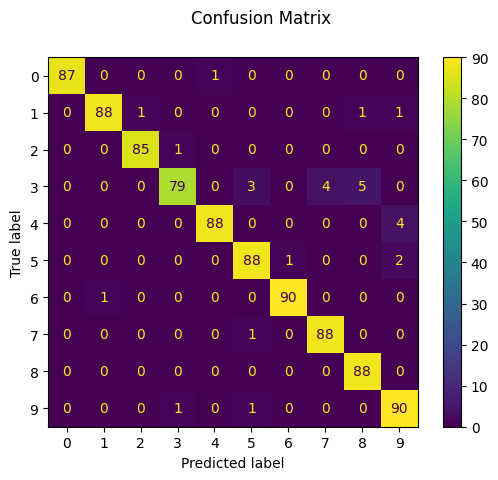

In [25]:
svm_classifier = svm.SVC(gamma=0.001)
svm_classifier.fit(X_train, y_train)

predicted = svm_classifier.predict(X_test)
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
images_and_prediction = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_prediction[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (
    svm_classifier, metrics.classification_report(y_test, predicted)))
cm = metrics.confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot()
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % cm)
print("\nAccuracy of the Algorithm: ", svm_classifier.score(X_test, y_test))
plt.show()

In [32]:
import pickle
filename = "svm_model.pkl"
pickle.dump(svm_classifier, open(filename, "wb"))

SVC(gamma=0.001)
